## Importing the libraries

In [94]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# version of the installed tf version
tf.__version__

'2.13.0'

## Importing the dataset

In [4]:
mnist = tf.keras.datasets.mnist

### Splitting the dataset

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [32]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [104]:
print(f'''
--- Size of train and test sets ---
x_train : {x_train.shape},
y_train : {y_train.shape},
x_test  : {x_test.shape},
y_test  : {y_test.shape},
'''
)


--- Size of train and test sets ---
x_train : (60000, 28, 28),
y_train : (60000,),
x_test  : (10000, 28, 28),
y_test  : (10000,),



## Printing the input

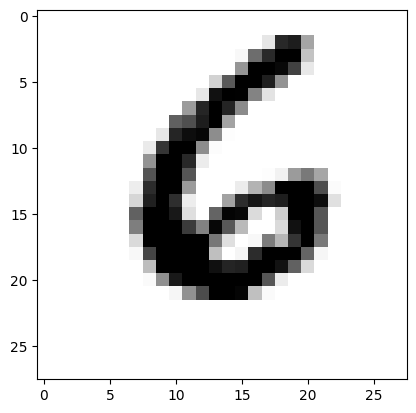

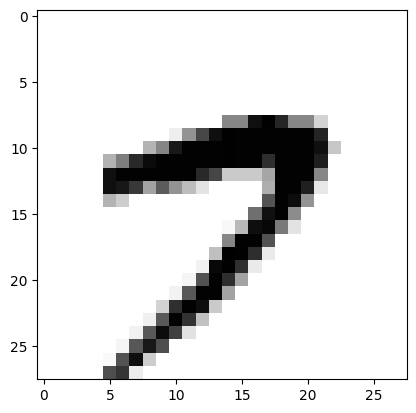

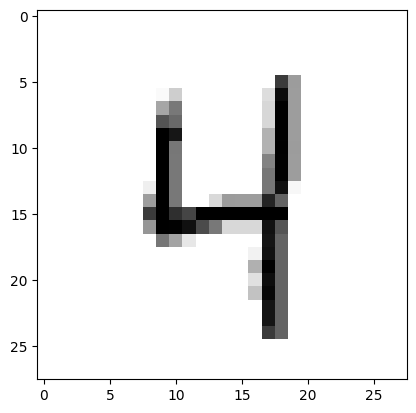

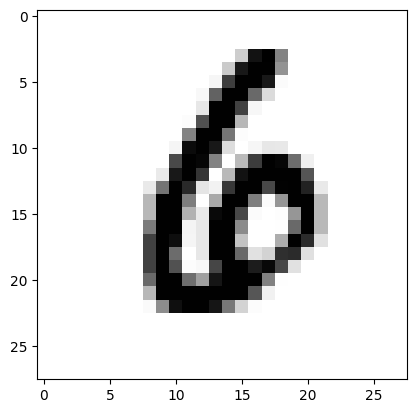

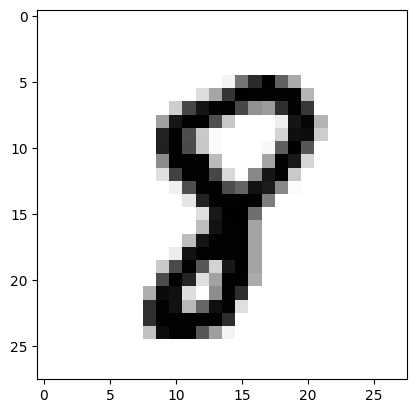

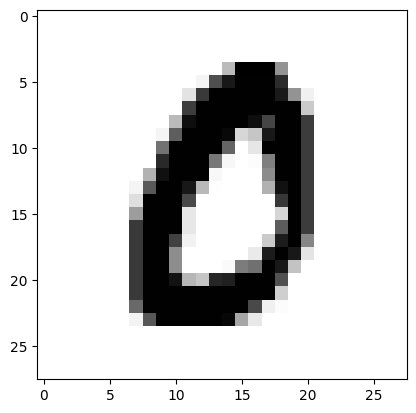

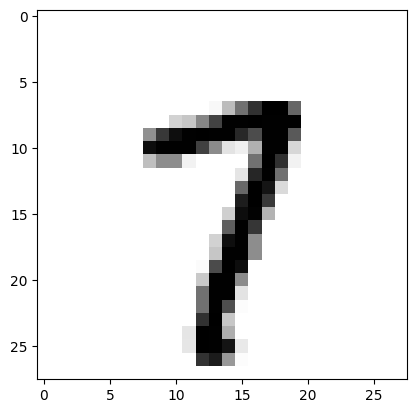

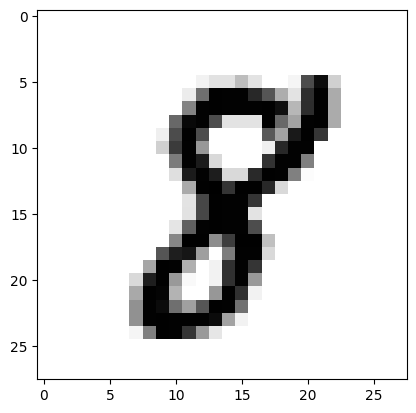

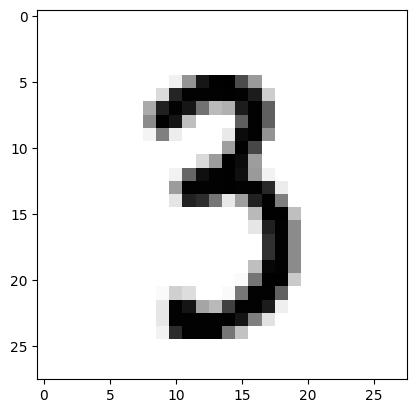

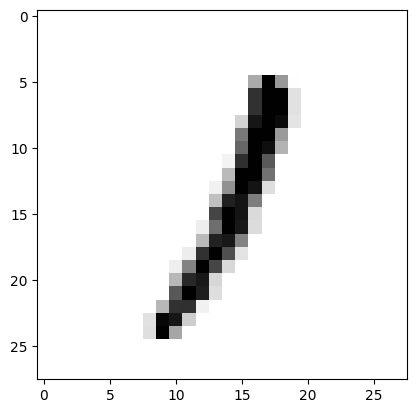

In [14]:
for i in range(90,100):
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.show()

## Normalization

In [44]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [107]:
# Normalized data - ranges between 0 and 1
x_train[0][5:7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00393124, 0.02332955, 0.02620568,
        0.02625207, 0.17420356, 0.17566281, 0.28629534, 0.05664824,
        0.51877786, 0.71632322, 0.77892406, 0.89301644, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05780486, 0.06524513,
        0.16128198, 0.22713296, 0.22277047, 0.32790981, 0.36833534,
        0.3689874 , 0.34978968, 0.32678448, 0.368094  , 0.3747499 ,
        0.79066747, 0.67980478, 0.61494005, 0.45002403, 0.        ,
        0.        , 0.        , 0.        ]])

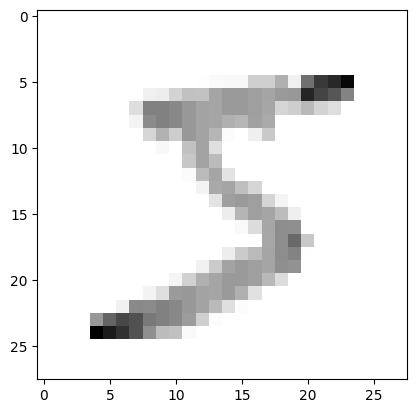

In [38]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

---

# Building model

- Building the architecture

In [49]:
model = tf.keras.models.Sequential()

In [51]:
model.add(tf.keras.layers.Flatten())

In [52]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

In [53]:
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

In [54]:
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [55]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Fitting the model

In [56]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2640 - accuracy: 0.9228
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1024 - accuracy: 0.9685
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0716 - accuracy: 0.9779


- model evaluation - accuracy and loss

In [63]:
loss, accuracy =model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9710


In [68]:
print ( f'''--- Evaluation metrics ---
       
Loss - {loss}
Accuracy - {accuracy}

------------------------''')

--- Evaluation metrics ---
       
Loss - 0.09418415278196335
Accuracy - 0.9710000157356262

------------------------


In [60]:
model.metrics_names

['loss', 'accuracy']

- Saving the model

In [70]:
model.save('mnist_text_classfier.model')

INFO:tensorflow:Assets written to: mnist_text_classfier.model\assets


INFO:tensorflow:Assets written to: mnist_text_classfier.model\assets


In [71]:
# loading the saved model
new_model = tf.keras.models.load_model('mnist_text_classfier.model')

In [74]:
# predict always takes the '''list''' 
predictions = new_model.predict([x_test[:10]])

1/1 [==============================] - 0s 42ms/step


In [85]:
# This gives the probability distribution
predictions

array([[8.96918362e-09, 7.73566633e-09, 2.14540955e-06, 3.06439688e-05,
        9.79209630e-11, 2.71057377e-09, 1.80206920e-14, 9.99966860e-01,
        3.42572859e-09, 3.39556067e-07],
       [9.98418841e-08, 4.46534868e-05, 9.99910831e-01, 4.27845989e-05,
        4.39785916e-11, 1.45407711e-07, 6.06293682e-09, 1.22686461e-09,
        1.42198667e-06, 2.72035450e-10],
       [6.82424024e-06, 9.98498559e-01, 8.28284974e-05, 1.43873345e-04,
        1.87255864e-05, 1.56310705e-06, 3.93002210e-06, 6.43753214e-04,
        5.63535141e-04, 3.63709805e-05],
       [9.99492288e-01, 2.98461117e-07, 3.52478324e-04, 3.49953126e-07,
        5.05341404e-06, 3.48919889e-06, 2.35557691e-05, 3.40067891e-05,
        2.44161555e-07, 8.82259119e-05],
       [4.04475531e-06, 1.19735273e-06, 1.44825744e-05, 2.79867436e-07,
        9.99487400e-01, 1.01852015e-06, 6.26913675e-07, 1.66496411e-05,
        3.30460034e-06, 4.70917003e-04],
       [6.59441284e-05, 9.85786915e-01, 4.18212476e-05, 1.59583826e-04,
   

In [108]:
np.argmax(predictions[4])

4

In [88]:
predictions.shape[0]

10

In [89]:
# Getting the list of first 10 predictions 
pred_num = []
for i in range (predictions.shape[0]):
    pred_num.append(np.argmax(predictions[i]))

In [93]:
pred_num

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

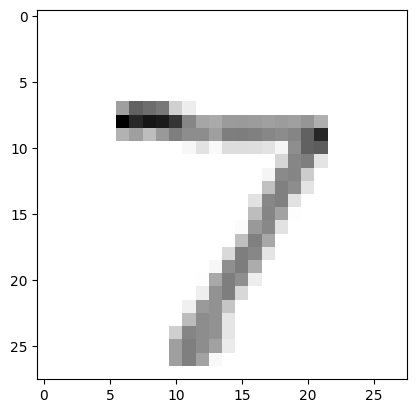

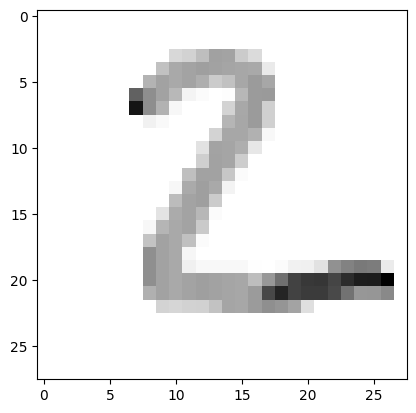

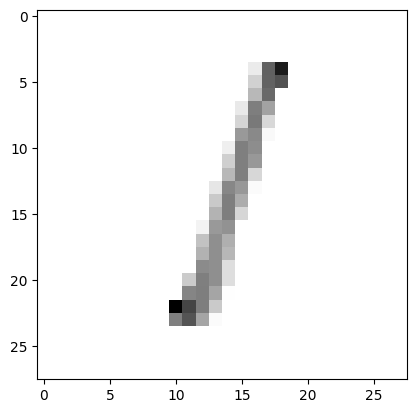

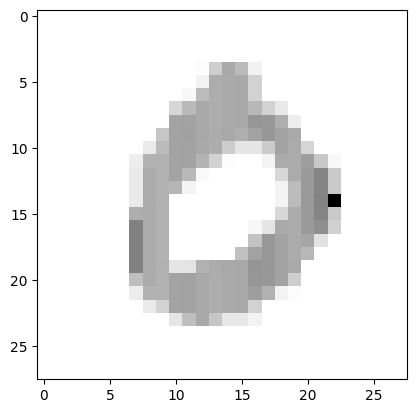

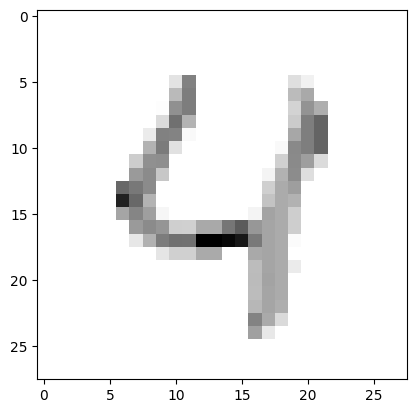

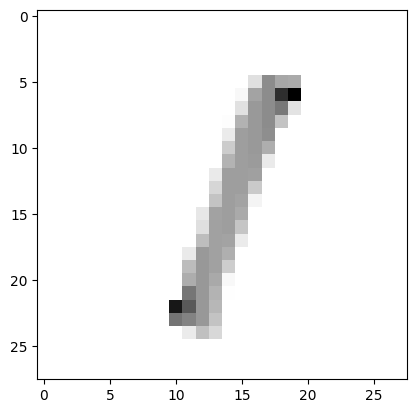

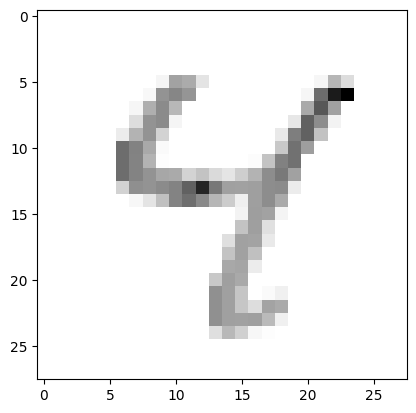

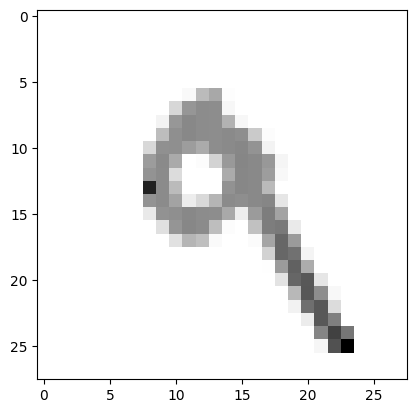

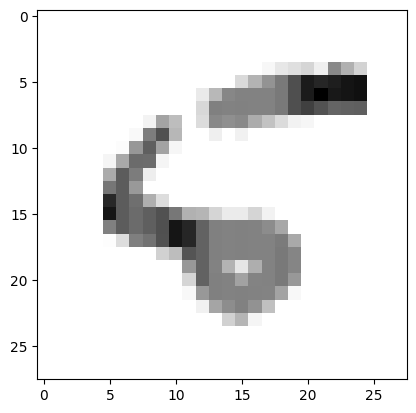

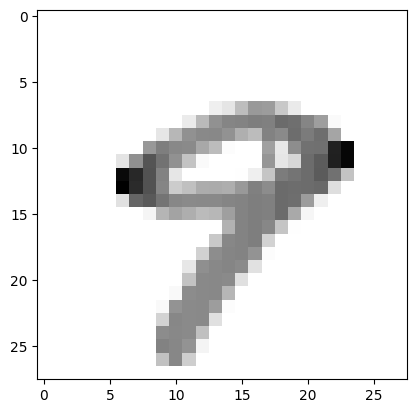

In [92]:
# Getting the image of the first 10 true values.
for i in range(10):
    plt.imshow(x_test[i],cmap=plt.cm.binary)
    plt.show()

---